In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.shape

(3276, 10)

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

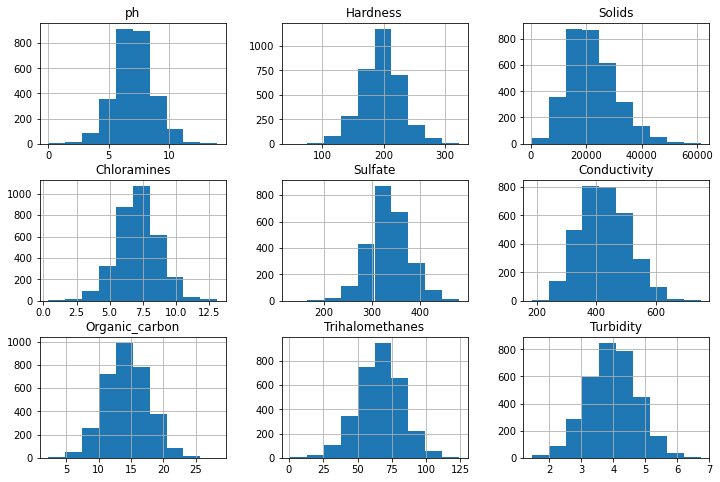

In [8]:
df.drop('Potability', axis=1).hist(figsize=(12,8))

In [9]:
# split into train test sets
train, test = train_test_split(df,test_size=0.2,random_state= 20)

In [10]:
train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
2494,6.039823,164.026340,9943.637599,7.723305,350.756261,374.794719,16.668446,65.542662,3.923766,0
2313,NaN,144.995790,16219.475320,5.563067,379.962973,374.543069,11.118073,72.290773,4.904367,1
1907,7.369989,236.476721,18998.346823,7.404435,359.930566,357.066203,18.020331,58.271257,3.463852,1
2170,NaN,162.512684,24642.812333,7.267573,330.905370,414.650725,11.583353,73.946186,3.215740,0
...,...,...,...,...,...,...,...,...,...,...
1428,8.268308,168.687890,13181.673516,6.383226,298.307093,294.298065,12.366424,79.206473,4.405408,0
2441,6.304769,213.656178,30168.606596,5.210780,NaN,339.116587,14.947676,43.576389,5.109935,1
2972,7.948488,197.594542,23602.187832,7.098458,NaN,394.767989,14.876694,78.974227,3.891124,0
271,7.275909,175.220376,22644.766348,7.886855,293.309854,373.345693,17.411683,56.799287,5.062298,1


In [11]:
train.shape

(2620, 10)

In [12]:
train.isnull().sum()

ph                 395
Hardness             0
Solids               0
Chloramines          0
Sulfate            614
Conductivity         0
Organic_carbon       0
Trihalomethanes    124
Turbidity            0
Potability           0
dtype: int64

In [13]:
train.isnull().mean()*100 

ph                 15.076336
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.435115
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.732824
Turbidity           0.000000
Potability          0.000000
dtype: float64

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

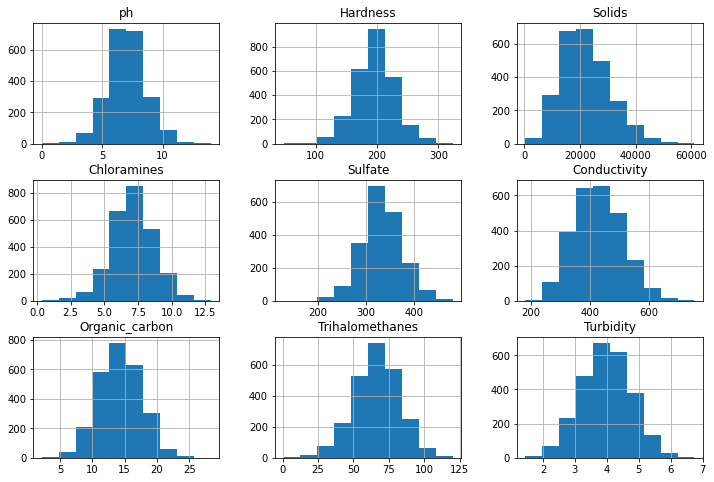

In [14]:
train.drop('Potability', axis=1).hist(figsize=(12,8))

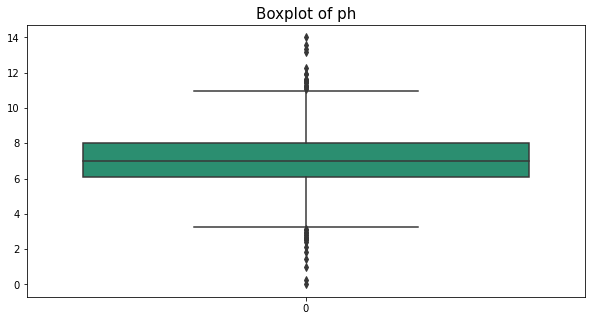

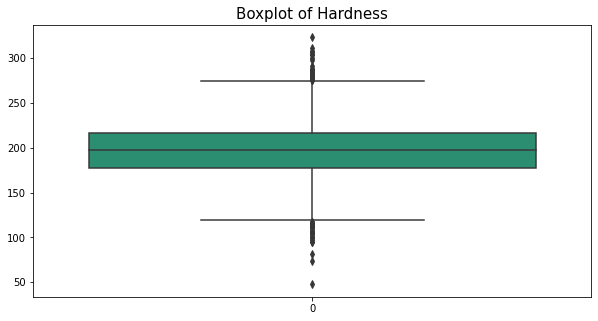

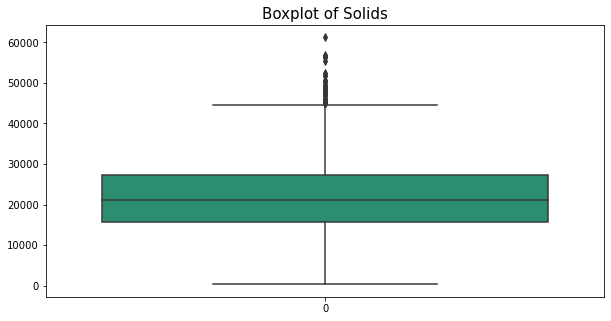

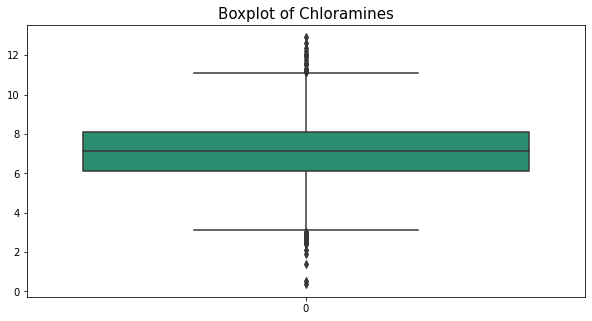

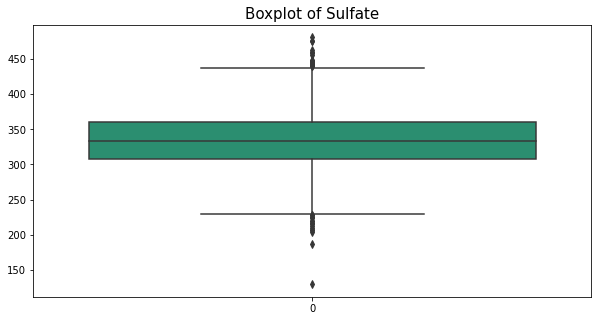

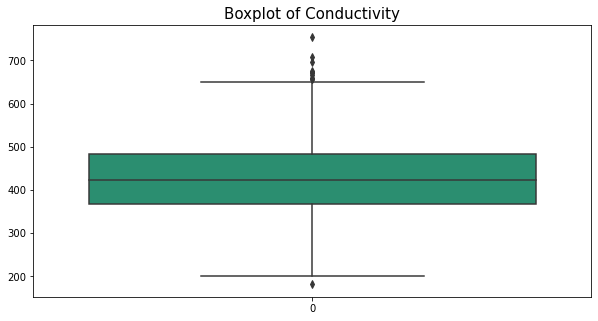

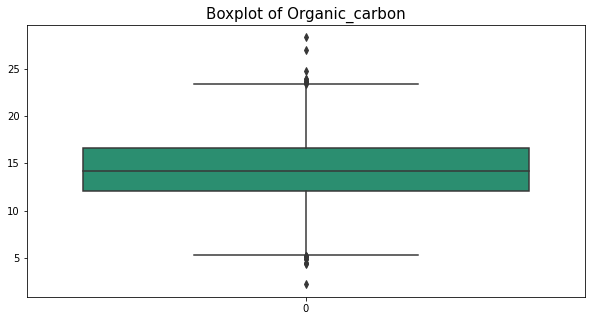

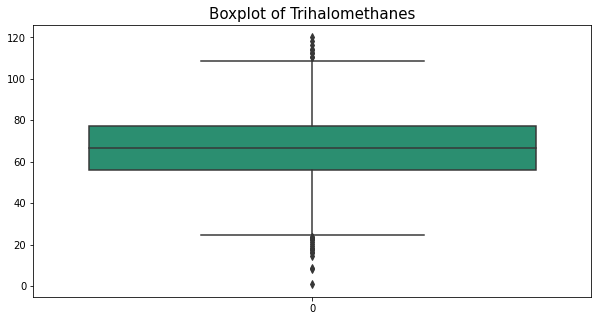

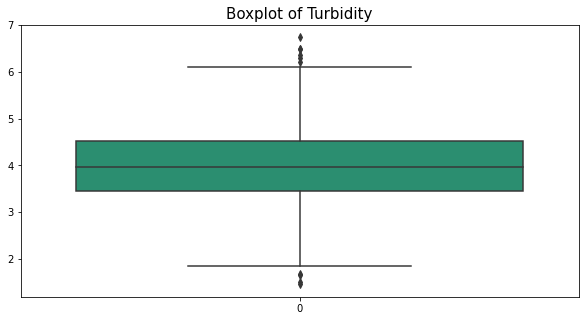

In [15]:
# All independent varibles are approximately normally distributed
for column in train.drop('Potability', axis=1).columns:
    #print(column)
    plt.figure(figsize=(10,5))
    plt.title("Boxplot of "+ column, fontsize=15)
    sns.boxplot(data = train[column], palette="Dark2")
    plt.show()
    #train[column].boxplot(figsize=(12,8))

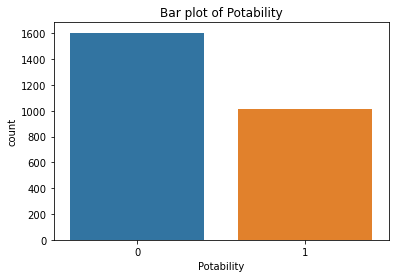

<Figure size 720x720 with 0 Axes>

In [16]:
sns.countplot(data=train,x='Potability')
plt.title('Bar plot of Potability')
plt.figure(figsize=(10,10))
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

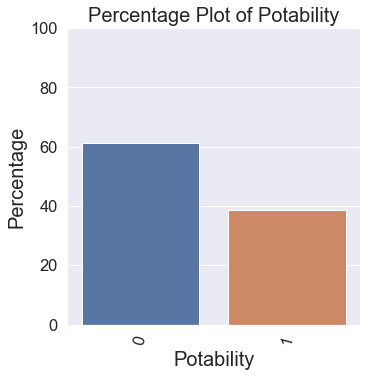

In [17]:
potability_df = train['Potability'].value_counts()
#potability_df = potability_df.mul(100).rename('Percent').reset_index()
#potability_df['percent'] = 
value0 = (potability_df[0] /(potability_df[0] + potability_df[1]))*100
value1 = (potability_df[1] /(potability_df[0] + potability_df[1]))*100
#print(value0)
#print(value1)
potability_df['percent'] = [value0,value1]
new_df = pd.DataFrame({'index':[0,1],'percent':[value0,value1]})
#new_df
sns.set(font_scale=1.5)
g = sns.catplot(x='index', y='percent', kind='bar', data=new_df)
g.ax.set_ylim(0,100)
plt.title('Percentage Plot of Potability', 
              fontdict={'fontsize': 20})
plt.xlabel('Potability', fontdict={'fontsize': 20})
plt.ylabel('Percentage', fontdict={'fontsize': 20})
plt.xticks(rotation=75)

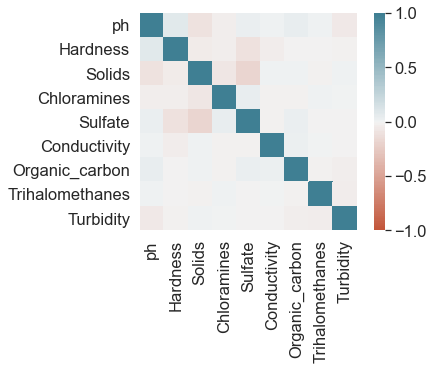

In [18]:
corr = train.drop('Potability', axis=1).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [19]:
#impute mean for the train data

train['ph'] = train['ph'].fillna(train['ph'].mean())
test['ph'] = test['ph'].fillna(train['ph'].mean())
train['Sulfate'] = train['Sulfate'].fillna(train['Sulfate'].mean())
test['Sulfate'] = test['Sulfate'].fillna(train['Sulfate'].mean())
train['Trihalomethanes'] = train['Trihalomethanes'].fillna(train['Trihalomethanes'].mean())
test['Trihalomethanes'] = test['Trihalomethanes'].fillna(train['Trihalomethanes'].mean())

C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [20]:
train.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [21]:
test.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# standardize

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
test[features] = sc.fit_transform(test[features])

C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [50]:
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1:]

In [51]:
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1:]

In [53]:
features= X_train.columns
X_train[features] = sc.fit_transform(X_train[features])
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3229,-6.029420e-16,0.208922,-1.291568,-0.179482,0.000000,-0.524834,0.518854,0.406877,-1.159647
2494,-6.965638e-01,-0.992554,-1.370714,0.387127,0.467576,-0.646340,0.716149,-0.060230,-0.063939
2313,-6.029420e-16,-1.576162,-0.660670,-0.981449,1.274907,-0.649459,-0.950311,0.367525,1.188546
1907,2.064222e-01,1.229271,-0.346270,0.185113,0.721172,-0.866083,1.122043,-0.521157,-0.651370
2170,-6.029420e-16,-1.038973,0.292342,0.098407,-0.081141,-0.152331,-0.810614,0.472460,-0.968275
...,...,...,...,...,...,...,...,...,...
1428,8.162481e-01,-0.849599,-1.004365,-0.461853,-0.982222,-1.644085,-0.575502,0.805904,0.551245
2441,-5.167050e-01,0.529437,0.917527,-1.204634,0.000000,-1.088566,0.199500,-1.452649,1.451111
2972,5.991381e-01,0.036877,0.174606,-0.008732,0.000000,-0.398775,0.178188,0.791182,-0.105631
271,1.425558e-01,-0.649268,0.066284,0.490741,-1.120355,-0.664301,0.939300,-0.614464,1.390266


In [54]:
features= X_train.columns
X_test[features] = sc.fit_transform(X_test[features])
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2378,-0.913279,-0.437123,-1.039275,-0.659902,1.133061,-0.218401,0.461025,-1.951505,0.176533
1444,-0.193132,-0.898193,-1.860674,-0.644044,1.101070,0.240155,-0.987426,-0.127591,0.414053
303,-0.043413,-0.430175,0.701123,0.267258,-0.983034,-0.069352,-1.761509,0.437947,-0.170048
2113,-0.418649,-0.384863,-0.891056,0.766883,1.097867,0.887732,-0.825551,-0.468728,-0.866669
2537,-1.119598,-1.362242,2.520802,-0.369939,-0.307887,-1.673111,-0.952507,0.367887,-0.351735
...,...,...,...,...,...,...,...,...,...
1927,-0.043413,-0.487151,0.456478,0.078114,0.006875,-1.380191,-1.261177,-1.523193,-2.963795
3264,-0.849325,1.267501,-0.154415,-0.508119,0.212993,-0.241775,1.453449,-0.139116,0.587890
59,-0.043413,-1.215424,-0.150807,0.640753,0.006875,-1.637492,0.724985,-0.407670,0.196692
605,-0.437346,-0.690374,-0.850823,0.358968,0.439462,2.820923,-1.269333,-0.577562,0.948233


# Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [58]:
params = {
    'max_depth': [2, 3, 4, 5,6,7,8,9,10],
    'min_samples_leaf': [5, 8, 12, 15, 20],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split' : [0.01,0.05,0.1]
}

In [59]:
clf_TUNED = DecisionTreeClassifier(random_state=20)

In [60]:
grid_search = GridSearchCV(estimator=clf_TUNED, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [61]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 8, 12, 15, 20],
                         'min_samples_split': [0.01, 0.05, 0.1]},
             scoring='accuracy', verbose=1)

In [62]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 0.01}

In [63]:
grid_search.best_score_

0.6267175572519085

##### Use the best tuned paramater and fit the model again

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [65]:
DT_clf = DecisionTreeClassifier(max_depth = 7, max_features = 'auto', min_samples_leaf = 5, min_samples_split=0.01,random_state=20)

In [66]:
DT_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7, max_features='auto', min_samples_leaf=5,
                       min_samples_split=0.01, random_state=20)

In [67]:
Y_pred = DT_clf.predict(X_test)

In [68]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.6128


In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5435230604011262

In [70]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[351  42]
 [212  51]]
              precision    recall  f1-score   support

           0       0.62      0.89      0.73       393
           1       0.55      0.19      0.29       263

    accuracy                           0.61       656
   macro avg       0.59      0.54      0.51       656
weighted avg       0.59      0.61      0.55       656



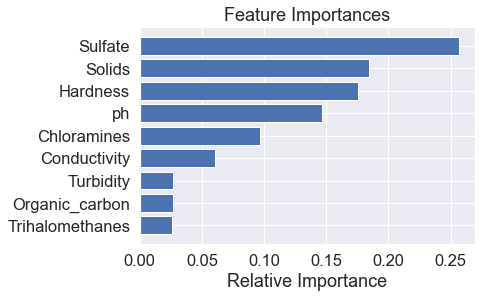

In [71]:
features = X_train.columns
importances = DT_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<AxesSubplot:>

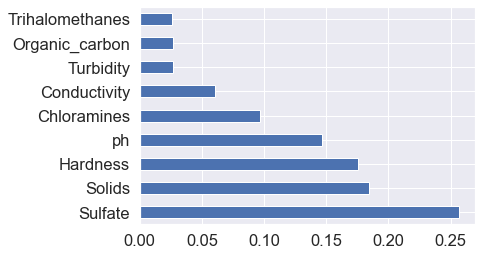

In [72]:
feat_imp_DT = pd.Series(DT_clf.feature_importances_, index=X_train.columns)
feat_imp_DT.nlargest(9).plot(kind='barh') 

In [73]:
important_feat = list(feat_imp_DT.nlargest(5).index)
important_feat

['Sulfate', 'Solids', 'Hardness', 'ph', 'Chloramines']

In [74]:
X_train_imp = X_train.loc[:,important_feat] 
X_test_imp = X_test.loc[:,important_feat]

In [75]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2620 entries, 3229 to 2522
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sulfate      2620 non-null   float64
 1   Solids       2620 non-null   float64
 2   Hardness     2620 non-null   float64
 3   ph           2620 non-null   float64
 4   Chloramines  2620 non-null   float64
dtypes: float64(5)
memory usage: 187.4 KB


In [76]:
grid_search.fit(X_train_imp, Y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 8, 12, 15, 20],
                         'min_samples_split': [0.01, 0.05, 0.1]},
             scoring='accuracy', verbose=1)

In [77]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 0.01}

In [78]:
grid_search.best_score_

0.6503816793893129

In [80]:
DT_clf_imp = DecisionTreeClassifier(max_depth = 9, max_features = 'auto', min_samples_leaf = 5, min_samples_split=0.01,random_state=20)

In [81]:
DT_clf_imp.fit(X_train_imp, Y_train)

DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=5,
                       min_samples_split=0.01, random_state=20)

In [82]:
Y_pred_imp = DT_clf_imp.predict(X_test_imp)

In [83]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_imp)))

Model accuracy score: 0.6387


In [84]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_imp)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5701825675558007

In [85]:
print(confusion_matrix(Y_test, Y_pred_imp))
print(classification_report(Y_test, Y_pred_imp))

[[360  33]
 [204  59]]
              precision    recall  f1-score   support

           0       0.64      0.92      0.75       393
           1       0.64      0.22      0.33       263

    accuracy                           0.64       656
   macro avg       0.64      0.57      0.54       656
weighted avg       0.64      0.64      0.58       656



# Random Forest

In [86]:
param_grid_RF = { 
    'n_estimators': [300,400,500,600,700,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [87]:
RFC = RandomForestClassifier(random_state=20)

In [89]:
Grid_rf= GridSearchCV(estimator=RFC, param_grid=param_grid_RF, cv= 5,n_jobs=-1,verbose =1,scoring='roc_auc')
Grid_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 400, 500, 600, 700, 800]},
             scoring='roc_auc', verbose=1)

In [90]:
Grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 700}

In [91]:
Grid_rf.best_score_

0.6592207234166628

In [92]:
RF = RandomForestClassifier(n_estimators=700,max_features='auto',max_depth=10,criterion='entropy', random_state=20 ,verbose = 1)

In [93]:
RF.fit(X_train, Y_train)

C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:   13.7s finished


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=700,
                       random_state=20, verbose=1)

In [94]:
y_pred_RF = RF.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test,y_pred_RF)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model accuracy score: 0.6585


[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.2s finished


<AxesSubplot:>

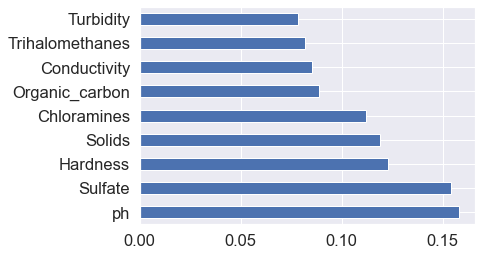

In [95]:
feat_imp_RF = pd.Series(RF.feature_importances_, index=X_train.columns)
feat_imp_RF.nlargest(15).plot(kind='barh') 

In [96]:
feat_imp_RF.nlargest(5)

ph             0.157833
Sulfate        0.154250
Hardness       0.123068
Solids         0.118770
Chloramines    0.112042
dtype: float64

In [97]:
important_feat = list(feat_imp_RF.nlargest(5).index)
important_feat

['ph', 'Sulfate', 'Hardness', 'Solids', 'Chloramines']

In [98]:
X_train_imp = X_train.loc[:,important_feat] 
X_test_imp = X_test.loc[:,important_feat]

In [99]:
Grid_rf= GridSearchCV(estimator=RFC, param_grid=param_grid_RF, cv= 5,n_jobs=-1,verbose =1,scoring='roc_auc')
Grid_rf.fit(X_train_imp, Y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 400, 500, 600, 700, 800]},
             scoring='roc_auc', verbose=1)

In [100]:
Grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 800}

In [101]:
Grid_rf.best_score_

0.696385985912251

In [102]:
RF = RandomForestClassifier(n_estimators=800,max_features='auto',max_depth=10,criterion='gini', random_state=20 ,verbose = 1)

In [103]:
RF.fit(X_train_imp, Y_train)

C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    8.6s finished


RandomForestClassifier(max_depth=10, n_estimators=800, random_state=20,
                       verbose=1)

In [104]:
Y_pred_imp = RF.predict(X_test_imp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    0.3s finished


In [105]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_imp)))

Model accuracy score: 0.6692


In [106]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_imp)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6063187530839114

In [107]:
print(confusion_matrix(Y_test, Y_pred_imp))
print(classification_report(Y_test, Y_pred_imp))

[[363  30]
 [187  76]]
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       393
           1       0.72      0.29      0.41       263

    accuracy                           0.67       656
   macro avg       0.69      0.61      0.59       656
weighted avg       0.68      0.67      0.63       656



### WIthout standardizing

In [109]:
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1:]

In [110]:
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1:]

# XG BOOST

In [111]:
import xgboost as xgb
from xgboost import XGBClassifier

In [112]:
xgb_model = XGBClassifier( random_state=20,learning_rate=0.01,eval_metric='auc')
# fit the model with the training data
xgb_model.fit(X_train,Y_train)

C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=20, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [113]:
y_pred_xgb = xgb_model.predict(X_test)

In [114]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test,y_pred_xgb)))

Model accuracy score: 0.6524


<AxesSubplot:>

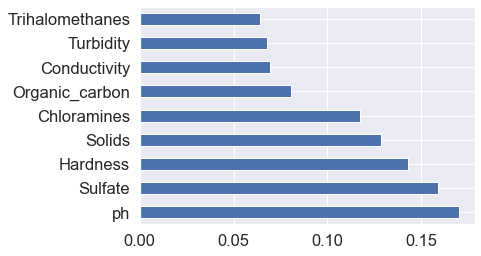

In [115]:
feat_imp_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feat_imp_xgb.nlargest(15).plot(kind='barh') 

In [116]:
imp_feat_xgb = list(feat_imp_xgb.nlargest(5).index)
imp_feat_xgb

['ph', 'Sulfate', 'Hardness', 'Solids', 'Chloramines']

In [117]:
X_train_xgb = X_train.loc[:,imp_feat_xgb] 
X_test_xgb = X_test.loc[:,imp_feat_xgb]

In [118]:
X_test_xgb

,ph,Sulfate,Hardness,Solids,Chloramines
2378,5.800034,374.357784,181.453515,13028.688458,6.106765
1444,6.848033,373.206834,165.815326,6068.454885,6.132132
303,7.065913,298.226719,181.689164,27776.180257,7.589869
2113,6.519848,373.091575,183.225998,14284.647917,8.389078
2537,5.499788,322.516582,150.076090,43195.473668,6.570596
...,...,...,...,...,...
1927,7.065913,333.840808,179.756708,25703.155201,7.287310
3264,5.893103,341.256362,239.269481,20526.666156,6.349561
59,7.065913,333.840808,155.055727,20557.240432,8.187319
605,6.492639,349.404057,172.863960,14625.561363,7.736570


In [119]:
params_xgb = {
    'max_depth': [4,5,6,7,8],
    'n_estimators': [300,400,500,600,700],
    'learning_rate': [0.1, 0.01, 0.05],
    'subsample':[i/10.0 for i in range(6,8)],
    'gamma':[i/10.0 for i in range(0,3)],
}

In [120]:
estimator = XGBClassifier(
    random_state=20,
    nthread=4
)

In [121]:
grid_search_xgb = GridSearchCV(estimator=estimator, 
                           param_grid=params_xgb, 
                           cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_xgb, Y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:02:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=20,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_met

In [122]:
grid_search_xgb.best_params_

{'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 300,
 'subsample': 0.6}

In [123]:
grid_search_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=20, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [125]:
final_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=300, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=20, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [126]:
final_xgb.fit(X_train_xgb, Y_train)

[00:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=20, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [127]:
y_pred_xgb = final_xgb.predict(X_test_xgb)

In [128]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_xgb)))

Model accuracy score: 0.6905


In [129]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6373368550392321

In [130]:
print(confusion_matrix(Y_test, y_pred_xgb))
print(classification_report(Y_test, y_pred_xgb))

[[356  37]
 [166  97]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       393
           1       0.72      0.37      0.49       263

    accuracy                           0.69       656
   macro avg       0.70      0.64      0.63       656
weighted avg       0.70      0.69      0.66       656



In [131]:
import pickle

In [133]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(final_xgb, open(filename, 'wb'))

In [134]:
# load the model from disk
filename = 'finalized_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_xgb, Y_test)
print(result)

0.6905487804878049
